In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time

In [15]:
df = pd.read_csv('/home/saurav/Desktop/Time_series/ice_cream.csv')
df

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


In [18]:
df.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)
df['date'] = pd.to_datetime(df.date)
df.set_index('date', inplace=True)
df

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


In [20]:
start_date = pd.to_datetime('2010-01-01')
df = df[start_date:]
df.head(5)

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


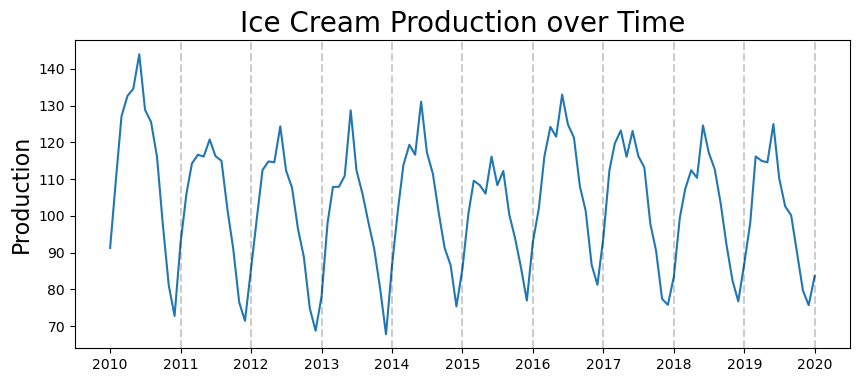

In [22]:
plt.figure(figsize=(10,4))
plt.plot(df.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ACF

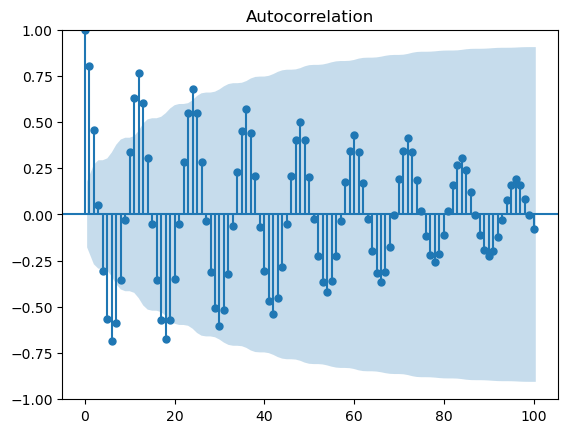

In [25]:
acf_plot = plot_acf(df.production, lags=100)

Based on decaying ACF, we are likely dealing with an Auto Regressive process

PACF

/home/saurav/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


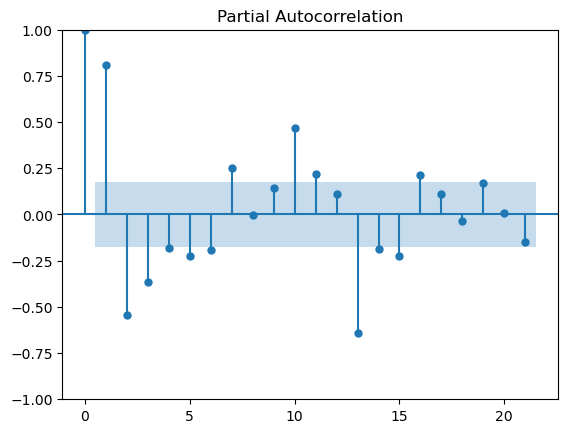

In [26]:
pacf_plot = plot_pacf(df.production)

Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

On stock data

In [27]:
import yfinance as yf

In [34]:
tickerSymbol = '^NSEI'
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')
tickerDf = tickerDf[['Close']]
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00+05:30,8395.450195
2015-01-05 00:00:00+05:30,8378.400391
2015-01-06 00:00:00+05:30,8127.350098
2015-01-07 00:00:00+05:30,8102.100098
2015-01-08 00:00:00+05:30,8234.599609


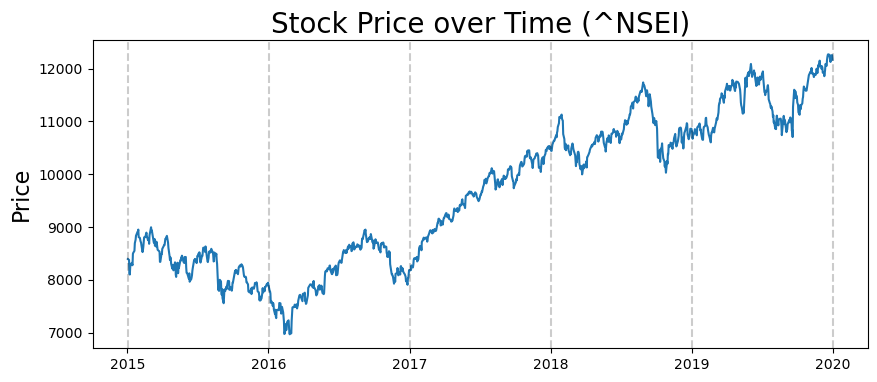

In [35]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [36]:
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [38]:
tickerDf['FirstDifference'] = first_diffs
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00+05:30,8395.450195,-17.049805
2015-01-05 00:00:00+05:30,8378.400391,-251.050293
2015-01-06 00:00:00+05:30,8127.350098,-25.250000
2015-01-07 00:00:00+05:30,8102.100098,132.499512
2015-01-08 00:00:00+05:30,8234.599609,49.900391


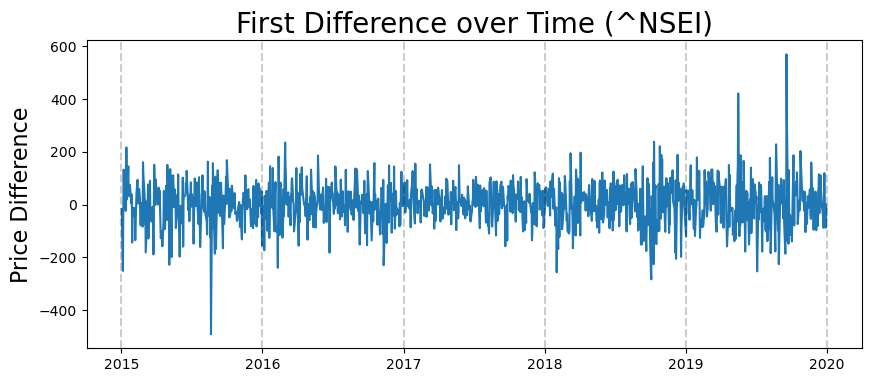

In [39]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

ACF

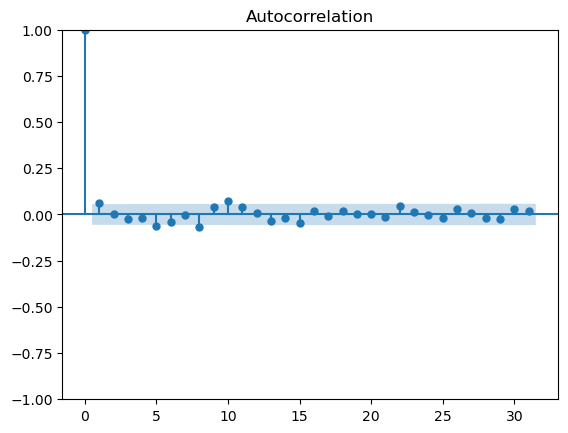

In [40]:
acf_plot = plot_acf(tickerDf.FirstDifference)

PACF

ACF isn't that informative

/home/saurav/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


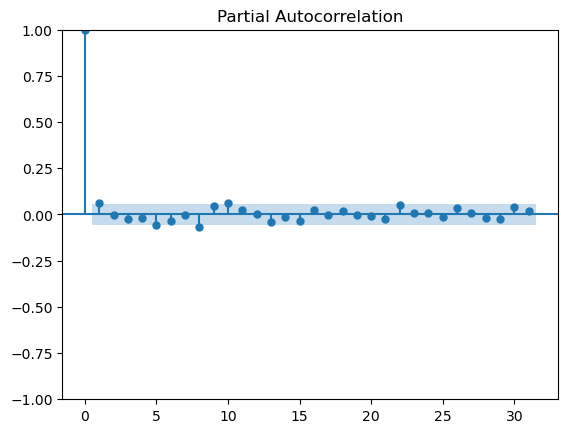

In [41]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

PACF also doesn't tell us much